In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import tree,svm
from sklearn.preprocessing import(LabelEncoder,
                                  OneHotEncoder, 
                                  StandardScaler)
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             confusion_matrix,
                             roc_auc_score)
from module import MultiLogistic, load_model

In [2]:
df = pd.read_csv('../data/HeartStudy_train.csv')
df.head()

,Sex,Age,SBP(mmHg),Treatment for Hypertension,Current Smoker,Diabetes,HDL,TCL,Risk
0,Female,74.0,113.0,Yes,Yes,No,66.0,135,Intermediate Risk (≥7.5% - <20%)
1,Male,69.0,93.0,No,No,Yes,48.0,374,High Risk (≥20%)
2,Female,43.0,94.0,No,No,No,83.0,315,Low Risk (<5%)
3,Female,63.0,140.0,No,Yes,Yes,14.0,195,High Risk (≥20%)
4,Female,67.0,NaN,Yes,No,Yes,34.0,275,High Risk (≥20%)


## EDA

High Risk (≥20%)                    5026
Intermediate Risk (≥7.5% - <20%)    3021
Low Risk (<5%)                      1393
Borderline Risk (>5% - <7.5%)        675
Name: Risk, dtype: int64


<AxesSubplot: title={'center': 'Count of the Risk values'}>

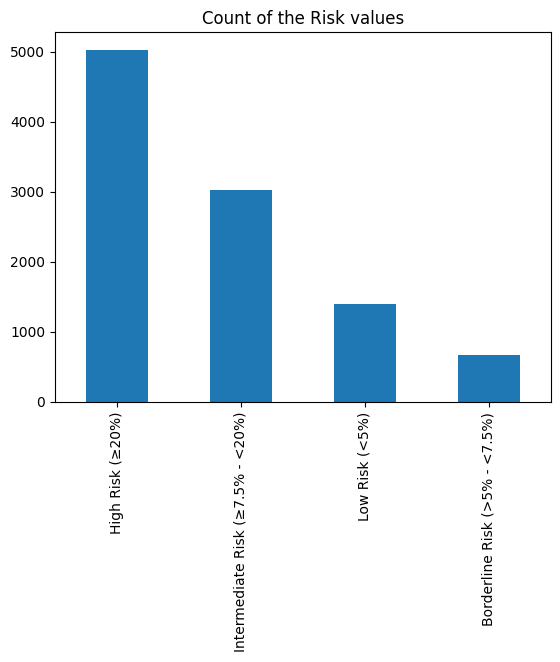

In [3]:
print(df["Risk"].value_counts())
df["Risk"].value_counts().plot(kind='bar',title='Count of the Risk values')

We can see that there are 4 categories/classes in the target variable, and we can see that High Risk contains more data.

Text(0.5, 1.0, 'Male vs Female Count')

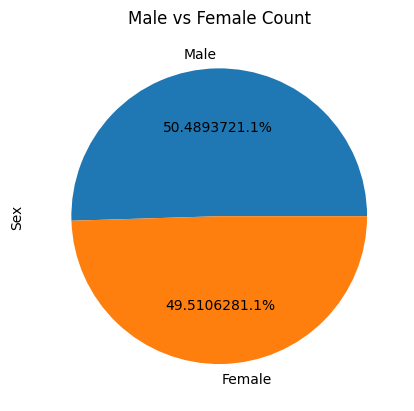

In [4]:
fig = df["Sex"].value_counts().plot(kind='pie',autopct='%f1.1%%')
fig.set_title("Male vs Female Count")

We can see it is fairly balanced data with, male only slightly more than female

Text(0.5, 1.0, 'Treatment for Hypertension')

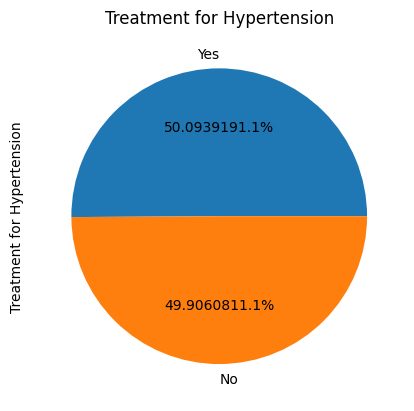

In [5]:
fig = df["Treatment for Hypertension"].value_counts().plot(kind='pie',autopct='%f1.1%%')
fig.set_title("Treatment for Hypertension")

We can see that people treating hypertension are just slightly more than people not treating hypertension.

Text(0.5, 1.0, 'People Who Smoke?')

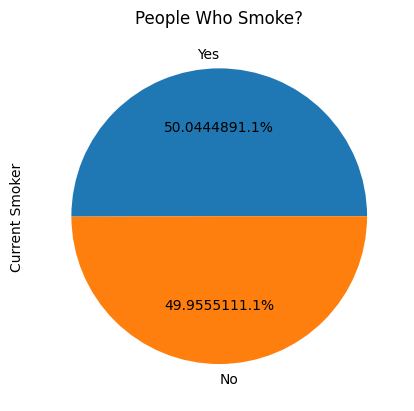

In [6]:
fig = df["Current Smoker"].value_counts().plot(kind='pie',autopct='%f1.1%%')
fig.set_title("People Who Smoke?")

We can see that smokers are fairly balanced and just slightly more than non smokers

Text(0.5, 1.0, 'People With Diabetes')

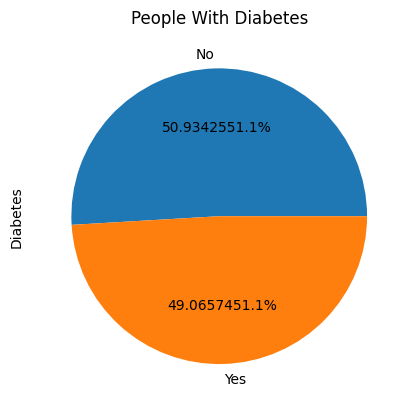

In [7]:
fig = df["Diabetes"].value_counts().plot(kind='pie',autopct='%f1.1%%')
fig.set_title("People With Diabetes")

We can see that diabetes also has balanced data.

**From all above categorical data charts, we can see all categorical data are fairly balanced with very slight skew towards positive side** 

<AxesSubplot: title={'center': 'Most Dangerous Age Group'}>

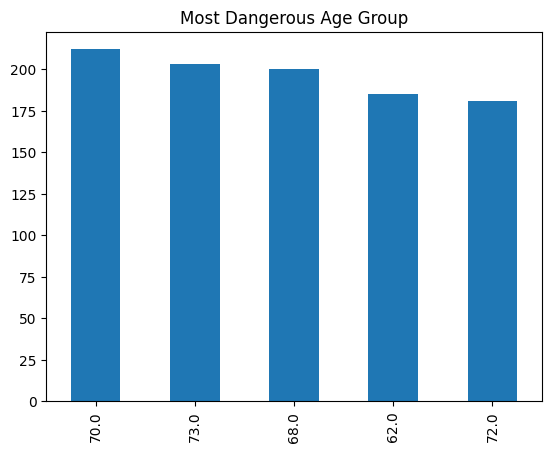

In [8]:
df_HighRisk = df[df['Risk']=='High Risk (≥20%)']
df_HighRisk['Age'].value_counts().head().plot(kind='bar',title='Most Dangerous Age Group')

From above graph we can see that with age increases the risk factor

<AxesSubplot: title={'center': 'High risk in Currently smoking'}>

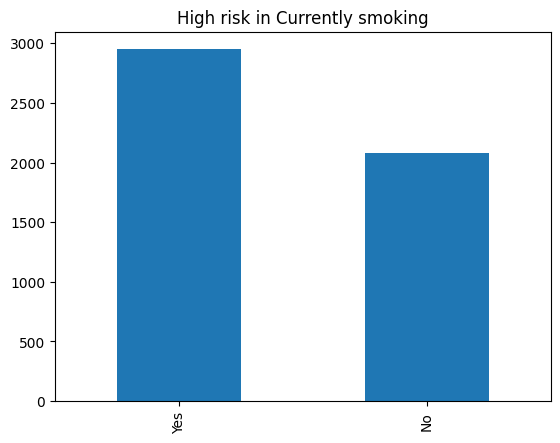

In [9]:
df_HighRisk['Current Smoker'].value_counts().plot(kind='bar',title='High risk in Currently smoking')

We can now see smoking significantly increases the Risk

In [10]:
df.dtypes

Sex                            object
Age                           float64
SBP(mmHg)                     float64
Treatment for Hypertension     object
Current Smoker                 object
Diabetes                       object
HDL                           float64
TCL                             int64
Risk                           object
dtype: object

Here we can see that columns : Sex, Treatment for Hypertension,Current Smoker, Diabetes are all categorical data. To get insights about Numeric data we can see the table below.

In [11]:
df.describe()

,Age,SBP(mmHg),HDL,TCL
count,10115.000000,10108.000000,10111.000000,10115.000000
mean,52.034909,144.332509,54.415884,252.418784
std,13.220314,32.808181,26.281776,88.201082
min,-74.000000,22.000000,10.000000,100.000000
25%,41.000000,117.000000,32.000000,177.000000
50%,52.000000,144.000000,53.000000,250.000000
75%,63.000000,173.000000,77.000000,329.000000
max,170.000000,200.000000,100.000000,405.000000


We can see that SBP and HDL have null values as thier counts are lower than others

## Null Data Detection and Removal

### Checking for null data

In [12]:
print(df.isna().any())
print("Count of null values")
print(df.isna().sum())

Sex                           False
Age                           False
SBP(mmHg)                      True
Treatment for Hypertension    False
Current Smoker                False
Diabetes                      False
HDL                            True
TCL                           False
Risk                          False
dtype: bool
Count of null values
Sex                           0
Age                           0
SBP(mmHg)                     7
Treatment for Hypertension    0
Current Smoker                0
Diabetes                      0
HDL                           4
TCL                           0
Risk                          0
dtype: int64


We can see that two columns SBP and HDL contains null  values, lets explore  further.

We can fill both as they both are numeric values, so we can fill the non available or null data by mean

In [13]:
df["HDL"] = df["HDL"].fillna(df["HDL"].mean())
df["SBP(mmHg)"]=df["SBP(mmHg)"].fillna(df["SBP(mmHg)"].mean())

In [14]:
print(df.isna().any())
print("Count of null values")
print(df.isna().sum())

Sex                           False
Age                           False
SBP(mmHg)                     False
Treatment for Hypertension    False
Current Smoker                False
Diabetes                      False
HDL                           False
TCL                           False
Risk                          False
dtype: bool
Count of null values
Sex                           0
Age                           0
SBP(mmHg)                     0
Treatment for Hypertension    0
Current Smoker                0
Diabetes                      0
HDL                           0
TCL                           0
Risk                          0
dtype: int64


Now our data contains no null values

## Outlier Detection and Removal

<AxesSubplot: >

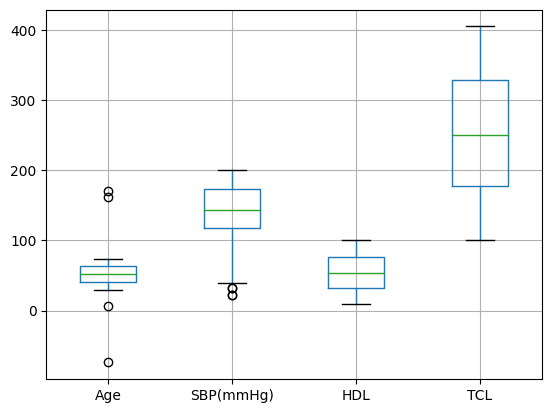

In [15]:
df.boxplot()

We can from boxplots see that Age and SBP may have outlier values

<AxesSubplot: >

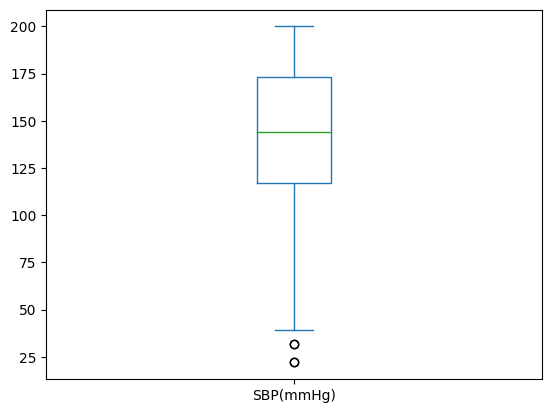

In [16]:
df["SBP(mmHg)"].plot(kind='box')

In [17]:
df["Age"].describe()

count    10115.000000
mean        52.034909
std         13.220314
min        -74.000000
25%         41.000000
50%         52.000000
75%         63.000000
max        170.000000
Name: Age, dtype: float64

We can see that the minimum value is -74 and as age can never be negative we can drop it, and maximum age was 170 and we can drop age greater than 125.

In [18]:
df = df[(df["Age"] > 0 ) & (df["Age"] < 125)]

<AxesSubplot: >

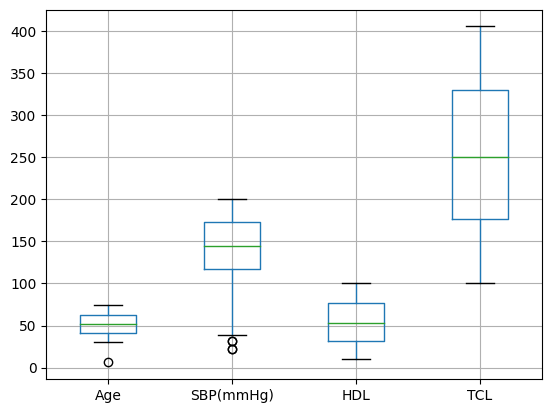

In [19]:
df.boxplot()

I did not remove the supposed outliers from SBP because they are quite close to the other values.

Looking into Correaltion of the data

<AxesSubplot: >

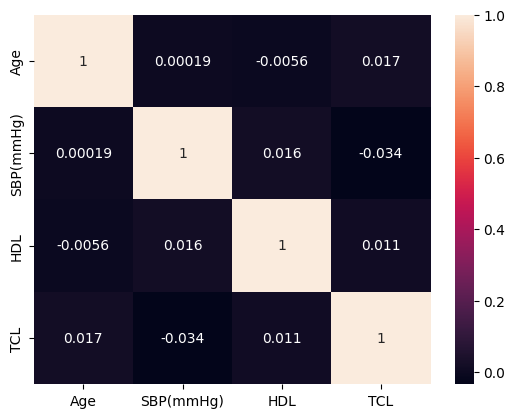

In [20]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

We can see that there is little to no correlation in the numeric data, so we will encode the data to get more insights

## Encoding and Standardization

The value of "Current Smoker","Diabetes","Treatment for Hypertension" affects the value of our Target value, so we label encode it

In [21]:
label_encoder = LabelEncoder()

cols = ["Current Smoker","Diabetes","Treatment for Hypertension"] 
df[cols] = df[cols].apply(label_encoder.fit_transform)

In [22]:
df.head()

,Sex,Age,SBP(mmHg),Treatment for Hypertension,Current Smoker,Diabetes,HDL,TCL,Risk
0,Female,74.0,113.000000,1,1,0,66.0,135,Intermediate Risk (≥7.5% - <20%)
1,Male,69.0,93.000000,0,0,1,48.0,374,High Risk (≥20%)
2,Female,43.0,94.000000,0,0,0,83.0,315,Low Risk (<5%)
3,Female,63.0,140.000000,0,1,1,14.0,195,High Risk (≥20%)
4,Female,67.0,144.332509,1,0,1,34.0,275,High Risk (≥20%)


Looking at the correlation after encoding

<AxesSubplot: >

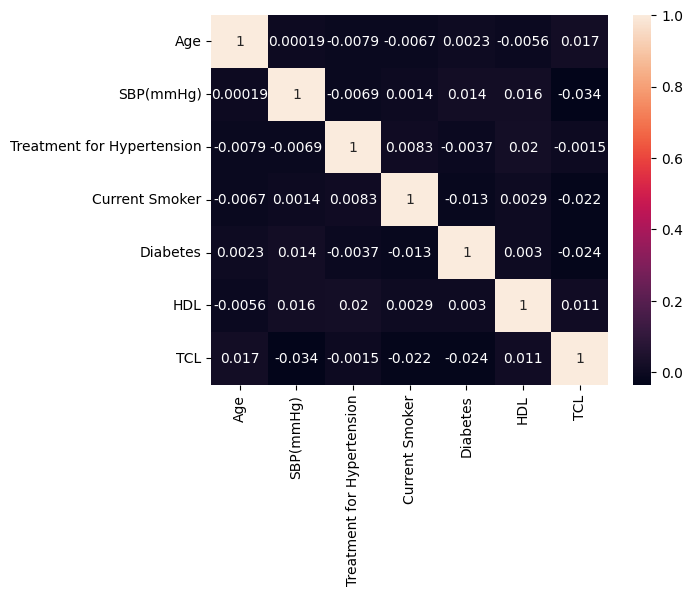

In [23]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

From the given heatmap, we can see that Risk has comparitively significant negative correlation with SBP,TCL and Age, meaning lesser the Age,TCL and SBP, lesser the risk.
And comparitively significant positive correlation with HDL, so as HDL increases risk also increases

The gender of the person is not the cause of heart risk, so we want our weights to be not influenced by the encoding of gender so we One hot encode it.

In [24]:
one_hot = OneHotEncoder()
transformed_data = one_hot.fit_transform(df[['Sex']]).toarray()
feature_array = (one_hot.categories_)
df[feature_array[0]] = transformed_data
df =df.drop(['Sex'],axis=1)


In [25]:
df.head()

,Age,SBP(mmHg),Treatment for Hypertension,Current Smoker,Diabetes,HDL,TCL,Risk,Female,Male
0,74.0,113.000000,1,1,0,66.0,135,Intermediate Risk (≥7.5% - <20%),1.0,0.0
1,69.0,93.000000,0,0,1,48.0,374,High Risk (≥20%),0.0,1.0
2,43.0,94.000000,0,0,0,83.0,315,Low Risk (<5%),1.0,0.0
3,63.0,140.000000,0,1,1,14.0,195,High Risk (≥20%),1.0,0.0
4,67.0,144.332509,1,0,1,34.0,275,High Risk (≥20%),1.0,0.0


In [26]:
df = df.astype({'Age': 'int', 'HDL': 'int'})

Splitting the Target variables and the feature variables

In [27]:
df_x = df.drop(['Risk'],axis=1)
df_y= df['Risk']

Standardization

In [28]:
stand = StandardScaler()
df_x = stand.fit_transform(df_x)

## Setting up Testing Data

Getting the data

In [29]:
test_df = pd.read_csv('../data/HeartStudy_test.csv')
test_df.head()

,Sex,Age,SBP(mmHg),Treatment for Hypertension,Current Smoker,Diabetes,HDL,TCL,Risk
0,Male,67,97,No,No,Yes,32,379,High Risk (≥20%)
1,Male,38,102,Yes,Yes,Yes,16,228,High Risk (≥20%)
2,Female,53,109,Yes,No,Yes,13,180,Intermediate Risk (≥7.5% - <20%)
3,Male,73,137,Yes,Yes,Yes,39,145,High Risk (≥20%)
4,Female,72,182,No,Yes,Yes,76,230,High Risk (≥20%)


Splitting Feature and Targets:

In [30]:
test_df_x = test_df.drop(['Risk'],axis=1)
test_df_y = test_df['Risk']

Encoding the Categorical Values:

In [31]:
cols = ["Current Smoker","Diabetes","Treatment for Hypertension"]
test_df_x[cols] = test_df_x[cols].apply(label_encoder.fit_transform)

One Hot Encoding Male Female:

In [32]:
transformed_data = one_hot.fit_transform(test_df_x[['Sex']]).toarray()
feature_array = (one_hot.categories_)

test_df_x[feature_array[0]] = transformed_data
test_df_x = test_df_x.drop('Sex',axis=1)

Standardization:

In [33]:
test_df_x = stand.fit_transform(test_df_x)

## For testing: Using Library

#### Logistic Test

In [34]:
log = LogisticRegression()
log = log.fit(df_x,df_y)

In [35]:
pred_y = log.predict(test_df_x)

In [36]:
print("The accuracy for Logistic regression(testing) is : ", (accuracy_score(pred_y,test_df_y)*100))

The accuracy for Logistic regression(testing) is :  87.68233387358185


In [37]:
print ('\nClassification Report:\n', classification_report(test_df_y, pred_y))


Classification Report:
                                   precision    recall  f1-score   support

   Borderline Risk (>5% - <7.5%)       0.72      0.42      0.53        43
                High Risk (≥20%)       0.91      0.95      0.93       300
Intermediate Risk (≥7.5% - <20%)       0.83      0.83      0.83       192
                  Low Risk (<5%)       0.90      0.95      0.92        82

                        accuracy                           0.88       617
                       macro avg       0.84      0.79      0.80       617
                    weighted avg       0.87      0.88      0.87       617



#### Descision Tree Test

In [38]:
df

,Age,SBP(mmHg),Treatment for Hypertension,Current Smoker,Diabetes,HDL,TCL,Risk,Female,Male
0,74,113.000000,1,1,0,66,135,Intermediate Risk (≥7.5% - <20%),1.0,0.0
1,69,93.000000,0,0,1,48,374,High Risk (≥20%),0.0,1.0
2,43,94.000000,0,0,0,83,315,Low Risk (<5%),1.0,0.0
3,63,140.000000,0,1,1,14,195,High Risk (≥20%),1.0,0.0
4,67,144.332509,1,0,1,34,275,High Risk (≥20%),1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10110,40,107.000000,1,0,0,95,123,Low Risk (<5%),0.0,1.0
10111,57,186.000000,1,1,0,72,325,High Risk (≥20%),1.0,0.0
10112,39,93.000000,0,1,0,87,347,Low Risk (<5%),1.0,0.0
10113,36,121.000000,1,1,0,84,197,Low Risk (<5%),1.0,0.0


In [39]:
tree = tree.DecisionTreeClassifier()
tree = tree.fit(df_x,df_y)
pred_y_tree = tree.predict(test_df_x)

print("The accuracy for Descision Tree (testing) is : ", (accuracy_score(test_df_y,pred_y_tree)*100))
print ('\nClassification Report:\n', classification_report(test_df_y,pred_y_tree))

The accuracy for Descision Tree (testing) is :  90.76175040518638

Classification Report:
                                   precision    recall  f1-score   support

   Borderline Risk (>5% - <7.5%)       0.72      0.72      0.72        43
                High Risk (≥20%)       0.95      0.97      0.96       300
Intermediate Risk (≥7.5% - <20%)       0.88      0.87      0.88       192
                  Low Risk (<5%)       0.91      0.85      0.88        82

                        accuracy                           0.91       617
                       macro avg       0.87      0.85      0.86       617
                    weighted avg       0.91      0.91      0.91       617



#### SVM Test

In [40]:
sv = svm.SVC(random_state=42)
sv = sv.fit(df_x,df_y)

pred_y_svm = sv.predict(test_df_x)

print("The accuracy for SVM (testing) is : ", (accuracy_score(test_df_y,pred_y_svm)*100))
print ('\nClassification Report:\n', classification_report(test_df_y,pred_y_svm))

The accuracy for SVM (testing) is :  97.40680713128039

Classification Report:
                                   precision    recall  f1-score   support

   Borderline Risk (>5% - <7.5%)       0.88      0.88      0.88        43
                High Risk (≥20%)       0.98      1.00      0.99       300
Intermediate Risk (≥7.5% - <20%)       0.98      0.97      0.97       192
                  Low Risk (<5%)       0.99      0.94      0.96        82

                        accuracy                           0.97       617
                       macro avg       0.96      0.95      0.95       617
                    weighted avg       0.97      0.97      0.97       617



## Self Implementation for Algorithm

Creating two model objects with different iterations for testing

In [41]:
mcr = MultiLogistic(iteration=100)
df_y_temp = label_encoder.fit_transform(df_y)
mcr = mcr.fit(df_x,df_y_temp)

In [42]:
mcr_2 = MultiLogistic(iteration=150)
mcr_2 = mcr_2.fit(df_x,df_y_temp)

Fitting Both the models

In [43]:
predictions = mcr.predict(test_df_x)
predictions = label_encoder.inverse_transform(predictions)

In [44]:
predictions_2 = mcr_2.predict(test_df_x)
predictions_2 = label_encoder.inverse_transform(predictions_2)

Looking at the Classification report for both model

Model 1

In [45]:
print(classification_report(test_df_y,predictions,zero_division=1))

                                  precision    recall  f1-score   support

   Borderline Risk (>5% - <7.5%)       1.00      0.00      0.00        43
                High Risk (≥20%)       0.74      0.97      0.84       300
Intermediate Risk (≥7.5% - <20%)       0.48      0.47      0.48       192
                  Low Risk (<5%)       1.00      0.41      0.59        82

                        accuracy                           0.67       617
                       macro avg       0.81      0.46      0.48       617
                    weighted avg       0.71      0.67      0.63       617



Model 2

In [46]:
print(classification_report(test_df_y,predictions_2,zero_division=1))

                                  precision    recall  f1-score   support

   Borderline Risk (>5% - <7.5%)       1.00      0.00      0.00        43
                High Risk (≥20%)       0.74      0.97      0.84       300
Intermediate Risk (≥7.5% - <20%)       0.48      0.47      0.48       192
                  Low Risk (<5%)       1.00      0.41      0.59        82

                        accuracy                           0.67       617
                       macro avg       0.81      0.46      0.48       617
                    weighted avg       0.71      0.67      0.63       617



ROC Scores and Confusion Matrix Heatmap for Models mcr and mcr2:

ROC Score for the first Model

In [47]:

roc_auc_score(test_df_y,mcr.predict_prob(test_df_x), multi_class='ovr',average='macro')

0.861690978817532

Roc Score For the second model

In [48]:
roc_auc_score(test_df_y, mcr_2.predict_prob(test_df_x), multi_class='ovr',average='macro')

0.8618727284503316

Confusion Matrix Heat Map for first Model

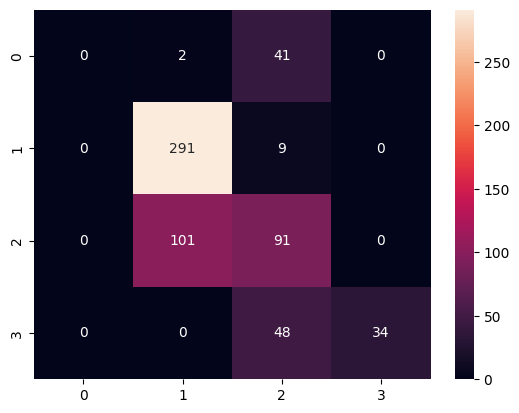

In [49]:
fig = sns.heatmap(confusion_matrix(test_df_y,predictions),annot=True,fmt='g')

Confusion Matrix Heatmap for the second model

<AxesSubplot: >

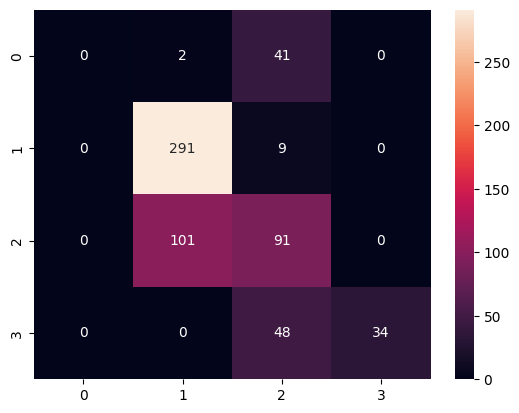

In [50]:
sns.heatmap(confusion_matrix(test_df_y,predictions_2), annot=True,fmt='g')

In [51]:
#mcr.save_model() The model saved here had 5000 iterations during training

Loading the Saved model, running predictions and checking performance metrics

In [52]:
pckl = load_model()

In [53]:
prediction_pickle = pckl.predict(test_df_x)
prediction_pickle = label_encoder.inverse_transform(prediction_pickle)

In [54]:
print(classification_report(test_df_y,prediction_pickle,zero_division=1))

                                  precision    recall  f1-score   support

   Borderline Risk (>5% - <7.5%)       1.00      0.00      0.00        43
                High Risk (≥20%)       0.74      0.98      0.85       300
Intermediate Risk (≥7.5% - <20%)       0.50      0.48      0.49       192
                  Low Risk (<5%)       1.00      0.45      0.62        82

                        accuracy                           0.69       617
                       macro avg       0.81      0.48      0.49       617
                    weighted avg       0.72      0.69      0.65       617



In [55]:
roc_auc_score(test_df_y,pckl.predict_prob(test_df_x), multi_class='ovr',average='macro')

0.8771967219237841

<AxesSubplot: >

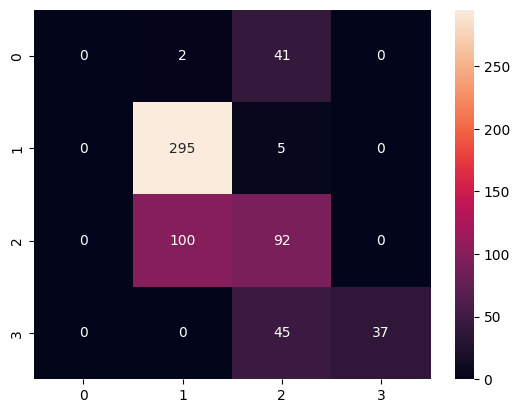

In [56]:
sns.heatmap(confusion_matrix(test_df_y,prediction_pickle), annot=True,fmt='g')

---